In [21]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\Users\Adarsh k\OneDrive\Desktop\Datasets\ML Project\student\student-mat.csv", delimiter=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
selected_features = ['sex', 'age', 'studytime', 'failures']

In [7]:
le_sex = LabelEncoder()

In [8]:
df['sex'] = le_sex.fit_transform(df['sex'])

In [9]:
label_encoders = {'sex': le_sex}

In [10]:
numerical_columns = ['age', 'studytime', 'failures']

In [11]:
scaler = StandardScaler()

In [12]:
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [13]:
df['performance'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

In [14]:
X = df[selected_features]
y = df['performance']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [17]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.37      0.49        27
           1       0.74      0.92      0.82        52

    accuracy                           0.73        79
   macro avg       0.73      0.65      0.65        79
weighted avg       0.73      0.73      0.71        79



In [18]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[10 17]
 [ 4 48]]


In [19]:
joblib.dump(clf, r"C:\Users\Adarsh k\OneDrive\Desktop\Datasets\ML Project\student_performance_model.pkl")
joblib.dump(label_encoders, r"C:\Users\Adarsh k\OneDrive\Desktop\Datasets\ML Project\label_encoders.pkl")
joblib.dump(scaler, r"C:\Users\Adarsh k\OneDrive\Desktop\Datasets\ML Project\scaler.pkl")

['C:\\Users\\Adarsh k\\OneDrive\\Desktop\\Datasets\\ML Project\\scaler.pkl']

In [20]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7342
Precision: 0.7385
Recall: 0.9231
F1 Score: 0.8205


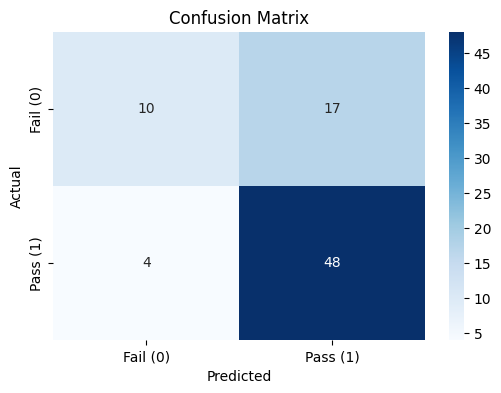

In [23]:
cm = confusion_matrix(y_test, y_pred)
labels = ['Fail (0)', 'Pass (1)']
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()